# dual_autodiff Tutorial

In [7]:
# import modules

import dual_autodiff as df
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# initialise dual number
x = df.Dual(2, 1)
print(f"x.real = {x.real}, x.dual = {x.dual}")

x.real = 2, x.dual = 1


In [3]:
# printing dual number
print(x)

Dual(real=2, dual=1)


In [4]:
# basic arithmetic operations

x = df.Dual(2, 1)
y = df.Dual(3, 2)

print(f"x + y = {x + y}")
print(f"x - y = {x - y}")
print(f"x * y = {x * y}")
print(f"x / y = {x / y}")

x + y = Dual(real=5, dual=3)
x - y = Dual(real=-1, dual=-1)
x * y = Dual(real=6, dual=7)
x / y = Dual(real=0.6666666666666666, dual=-0.25)


In [5]:
# trigonometric operations

print(f"sin(x) = {x.sin()}")
print(f"cos(x) = {x.cos()}")
print(f"tan(x) = {x.tan()}")

sin(x) = Dual(real=0.9092974268256817, dual=-0.4161468365471424)
cos(x) = Dual(real=-0.4161468365471424, dual=-0.9092974268256817)
tan(x) = Dual(real=-2.185039863261519, dual=5.774399204041917)


In [6]:
# the natural logarithm and exponential

print(f"log(x) = {x.log()}")
print(f"exp(x) = {x.exp()}")

log(x) = Dual(real=0.6931471805599453, dual=0.5)
exp(x) = Dual(real=7.38905609893065, dual=7.38905609893065)


In [7]:
# powers

print(f"x**y = {x**y}")

x**y = Dual(real=8, dual=35.090354888959126)


In [8]:
# automatic differentiation

x = df.Dual(1.5, 1) #initialise x = 1.5, with x.dual = 1 to allow for differentiation

function = x.sin().log() + x**2 * x.cos() #f(x) = log(sin(x)) + x^2 * cos(x)

print(f"log(sin(x)) + x^2 cos(x) = {function.real}")
print(f"d/dx(log(sin(x)) + x^2 cos(x)) = {function.dual}")

log(sin(x)) + x^2 cos(x) = 0.15665054756073515
d/dx(log(sin(x)) + x^2 cos(x)) = -1.9612372705533612


In [4]:
# comparison to analytic and numerical methods:

def f(x):
    return np.log(np.sin(x)) + x**2 * np.cos(x)

def dfdx(x):
    return np.cos(x) / np.sin(x) + 2*x*np.cos(x) - x**2 * np.sin(x)

print(f"analytic df/dx = {dfdx(x=1.5)}")

def central(f, x, h=1e-5):
    return (f(x+h) - f(x-h))/(2*h)

print(f"numerical df/dx = {central(f, x=1.5)}")

analytic df/dx = -1.9612372705533612
numerical df/dx = -1.9612372706409584


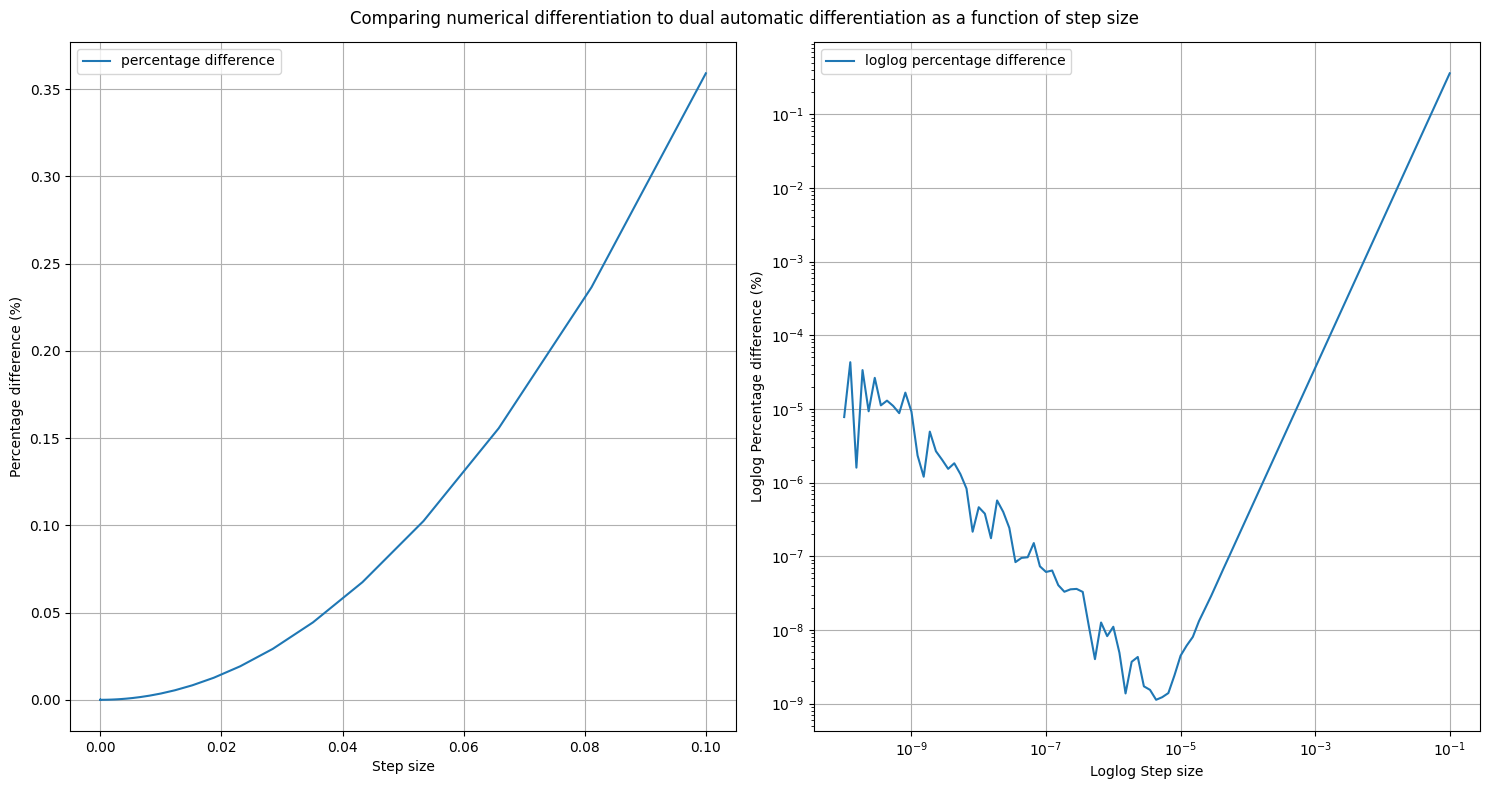

In [58]:
# numerical methods with different step counts:
def numerical_compare():
    N = np.array([10**i for i in np.linspace(1,10,100)])
    steps = 1/N
    x = df.Dual(1.5, 1)
    dual_result = x.sin().log() + x**2 * x.cos()
    results = []
    for step in steps:
        result = (central(f, x=1.5, h=step))
        # print(step)
        # print(f"numerical df/dx, step = {step}: {result}")
        # print(f"dual automatic df/dx = {dual_result.dual}")
        # print(f"percentage difference: {(np.abs((dual_result.dual-result)/dual_result.dual))*100}%\n")
        results.append((np.abs((dual_result.dual-result)/dual_result.dual))*100)

    fig, ax = plt.subplots(ncols=2, figsize=(15,8))
    plt.suptitle("Comparing numerical differentiation to dual automatic differentiation as a function of step size")

    ax[0].plot(steps, results, label="percentage difference")
    ax[0].set_xlabel("Step size")
    ax[0].set_ylabel("Percentage difference (%)")
    ax[0].legend()
    ax[0].grid()
    
    ax[1].plot(steps, results, label="loglog percentage difference")
    ax[1].set_xlabel("Loglog Step size")
    ax[1].set_ylabel("Loglog Percentage difference (%)")
    ax[1].legend()
    ax[1].grid()
    ax[1].loglog()
    plt.tight_layout()
    
    plt.show()


numerical_compare()

In [17]:
import dual_autodiff_x as dfx
import time
import memory_profiler as mp
import tracemalloc

In [18]:
def timer(func, *args):
    start = time.time()
    func(*args)
    end = time.time()
    return end - start

In [21]:
def user(func, *args):
    tracemalloc.start()
    func(*args)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak

In [23]:
N = np.arange(10, 10000, 10)

operations = ['add', 'sub', 'mul', 'div', 'pow', 'sin', 'cos', 'tan', 'log', 'exp']

memory = np.zeros((len(N), 2, len(operations)))
for i, n in enumerate(N):
    x = df.Dual(np.random.rand(), np.random.rand())
    memory[i, 0, 0] = user(lambda:[x+x for _ in range(n)])
    memory[i, 0, 1] = user(lambda:[x-x for _ in range(n)])
    memory[i, 0, 2] = user(lambda:[x*x for _ in range(n)])
    memory[i, 0, 3] = user(lambda:[x/x for _ in range(n)])
    memory[i, 0, 4] = user(lambda:[x**x for _ in range(n)])
    memory[i, 0, 5] = user(lambda:[x.sin() for _ in range(n)])
    memory[i, 0, 6] = user(lambda:[x.cos() for _ in range(n)])
    memory[i, 0, 7] = user(lambda:[x.tan() for _ in range(n)])
    memory[i, 0, 8] = user(lambda:[x.log() for _ in range(n)])
    memory[i, 0, 9] = user(lambda:[x.exp() for _ in range(n)])

    x = dfx.Dual(np.random.rand(), np.random.rand())
    memory[i, 1, 0] = user(lambda:[x+x for _ in range(n)])
    memory[i, 1, 1] = user(lambda:[x-x for _ in range(n)])
    memory[i, 1, 2] = user(lambda:[x*x for _ in range(n)])
    memory[i, 1, 3] = user(lambda:[x/x for _ in range(n)])
    memory[i, 1, 4] = user(lambda:[x**x for _ in range(n)])
    memory[i, 1, 5] = user(lambda:[x.sin() for _ in range(n)])
    memory[i, 1, 6] = user(lambda:[x.cos() for _ in range(n)])
    memory[i, 1, 7] = user(lambda:[x.tan() for _ in range(n)])
    memory[i, 1, 8] = user(lambda:[x.log() for _ in range(n)])
    memory[i, 1, 9] = user(lambda:[x.exp() for _ in range(n)])


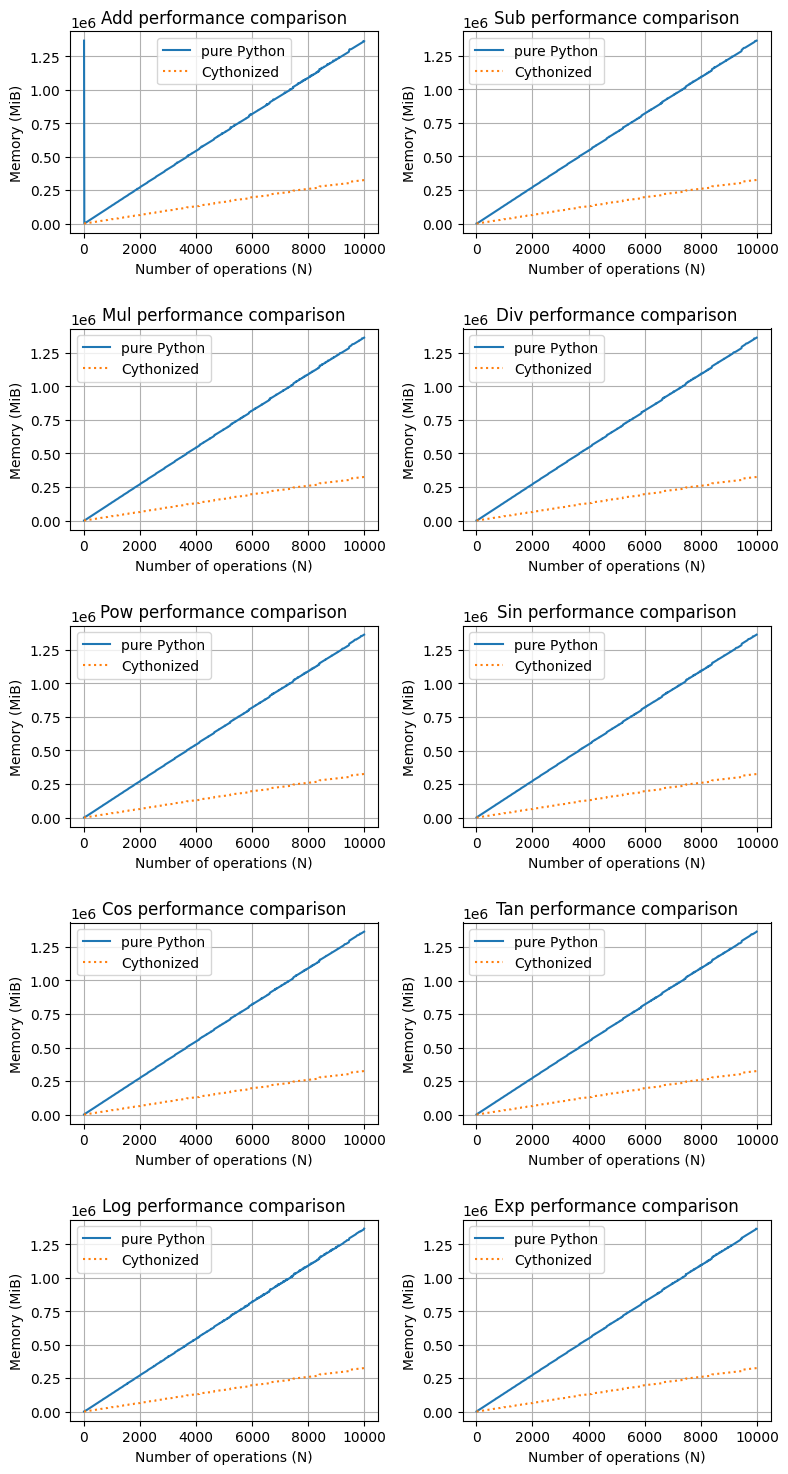

In [25]:
plt.figure(figsize=(8,15))
for i, operation in enumerate(operations):
    plt.subplot(5,2, i+1)
    plt.plot(N, memory[:, 0, i], label="pure Python")
    plt.plot(N, memory[:, 1, i], label="Cythonized", linestyle='dotted')
    plt.xlabel("Number of operations (N)")
    plt.ylabel("Memory (MiB)")
    plt.title(f"{operation.capitalize()} performance comparison")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()



In [15]:
N = np.arange(10, 10000, 10)

operations = ['add', 'sub', 'mul', 'div', 'pow', 'sin', 'cos', 'tan', 'log', 'exp']


times = np.zeros((len(N), 2, len(operations)))
for i, n in enumerate(N):
    x = df.Dual(np.random.rand(), np.random.rand())
    times[i, 0, 0] = timer(lambda:[x+x for _ in range(n)])
    times[i, 0, 1] = timer(lambda:[x-x for _ in range(n)])
    times[i, 0, 2] = timer(lambda:[x*x for _ in range(n)])
    times[i, 0, 3] = timer(lambda:[x/x for _ in range(n)])
    times[i, 0, 4] = timer(lambda:[x**x for _ in range(n)])
    times[i, 0, 5] = timer(lambda:[x.sin() for _ in range(n)])
    times[i, 0, 6] = timer(lambda:[x.cos() for _ in range(n)])
    times[i, 0, 7] = timer(lambda:[x.tan() for _ in range(n)])
    times[i, 0, 8] = timer(lambda:[x.log() for _ in range(n)])
    times[i, 0, 9] = timer(lambda:[x.exp() for _ in range(n)])

    x = dfx.Dual(np.random.rand(), np.random.rand())
    times[i, 1, 0] = timer(lambda:[x+x for _ in range(n)])
    times[i, 1, 1] = timer(lambda:[x-x for _ in range(n)])
    times[i, 1, 2] = timer(lambda:[x*x for _ in range(n)])
    times[i, 1, 3] = timer(lambda:[x/x for _ in range(n)])
    times[i, 1, 4] = timer(lambda:[x**x for _ in range(n)])
    times[i, 1, 5] = timer(lambda:[x.sin() for _ in range(n)])
    times[i, 1, 6] = timer(lambda:[x.cos() for _ in range(n)])
    times[i, 1, 7] = timer(lambda:[x.tan() for _ in range(n)])
    times[i, 1, 8] = timer(lambda:[x.log() for _ in range(n)])
    times[i, 1, 9] = timer(lambda:[x.exp() for _ in range(n)])


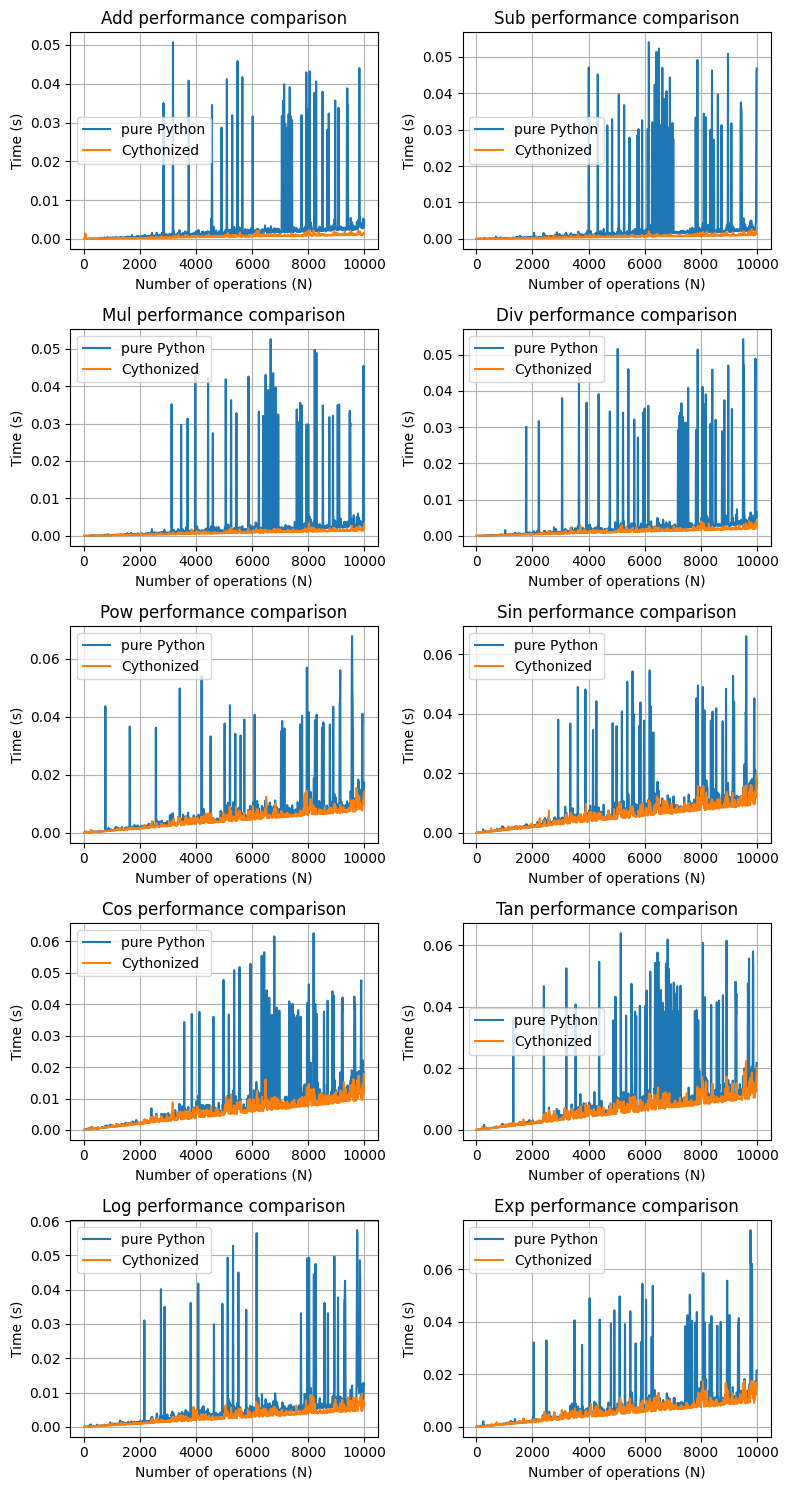

In [16]:
plt.figure(figsize=(8,15))
for i, operation in enumerate(operations):
    plt.subplot(5,2, i+1)
    plt.plot(N, times[:, 0, i], label="pure Python")
    plt.plot(N, times[:, 1, i], label="Cythonized")
    plt.xlabel("Number of operations (N)")
    plt.ylabel("Time (s)")
    plt.title(f"{operation.capitalize()} performance comparison")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

